In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
splitted_regs_fancy = '/data/bswift-1/Pessoa_Lab/eCON/dataset/preproc2/CON002/splitted_regs_fancy'
regs_fancy = '/data/bswift-1/Pessoa_Lab/eCON/dataset/preproc2/CON002/regs_fancy'

In [9]:
!ls $regs_fancy

CON002_all_regs.txt	       CON002_Cv_motion_HRF.txt
CON002_block_offsets.txt       CON002_MotionAndShockCensor_1.0.txt
CON002_block_onsets.txt        CON002_MotionCensor_1.0.txt
CON002_buttonPress_run1.txt    CON002_MotionParDeriv.txt
CON002_buttonPress_run2.txt    CON002_offset_HRF.txt
CON002_buttonPress_run3.txt    CON002_onset_HRF.txt
CON002_buttonPress_run4.txt    CON002_sblock_HRF.txt
CON002_buttonPress_run5.txt    CON002_shock_anticipation.txt
CON002_buttonPress_run6.txt    CON002_shock_onsets.1D
CON002_censor15.txt	       CON002_shock_onsets_para.1D
CON002_censor.txt	       CON002_shock_onsets_run1.txt
CON002_Cmag_HRF.txt	       CON002_shock_onsets_run2.txt
CON002_Cprox_HRF.txt	       CON002_shock_onsets_run3.txt
CON002_CproxXmag_HRF.txt       CON002_shock_onsets_run4.txt
CON002_CproxXsign_HRF.txt      CON002_shock_onsets_run5.txt
CON002_CproxXsignXmag_HRF.txt  CON002_shock_onsets_run6.txt
CON002_Csign_HRF.txt	       CON002_shock_onsets.txt
CON002_CsignXmag_HRF.txt       regs.pn

In [13]:
proximity = pd.read_csv(regs_fancy+'/CON002_all_regs.txt',sep ='\t')['prox']

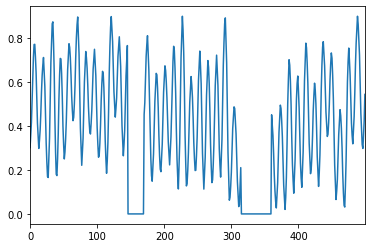

In [17]:
proximity.iloc[:500].plot()

In [41]:
%%bash 

echo ${splitted_regs_fancy}
timing_tool.py -timing /data/bswift-1/Pessoa_Lab/eCON/dataset/preproc2/CON002/splitted_regs_fancy/CON002_near_misses.txt \
    -timing_to_1D CON002_near_misses.1D \
    -tr 1.25 -stim_dur 1 -min_frac 0.3 -timing_to_1D_warn_ok \
    -run_len 450 450 450 450 450 450


timing_tool.py -timing CON002_shock_onsets.txt \
    -timing_to_1D CON002_shocks.1D \
    -tr 1.25 -min_frac 0.3 -timing_to_1D_warn_ok \
    -run_len 450 450 450 450 450 450

In [42]:
near_miss = pd.Series(np.loadtxt("CON002_near_misses.1D"))
shock = pd.Series(np.loadtxt("CON002_shocks.1D"))

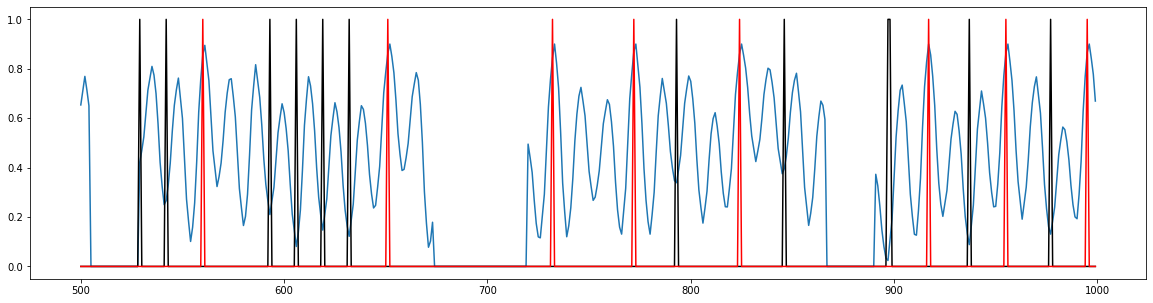

In [44]:
plt.figure(figsize=(20,5))
plt.plot(proximity[500:1000])
plt.plot(near_miss[500:1000],color='k')
plt.plot(shock[500:1000],color='red')

## Count near misses per subjects

In [47]:
yoked = pd.read_excel('/data/bswift-1/Pessoa_Lab/eCON/onsetdir/CON_yoked_table.xlsx')
yoked = yoked.query('use == 1').reset_index()

In [56]:
import itertools

def num_of_near_misses(filepath):
    with open(filepath,'r') as f:
        return len(list(itertools.chain(*[[float(onset) for onset in run.split(' ')] for run in f.readlines()])))

In [60]:
df = pd.DataFrame()
for ii, row in yoked.iterrows():
    subj = row['control']
    total = num_of_near_misses('/data/bswift-1/Pessoa_Lab/eCON/dataset/preproc2/{subj}/splitted_regs_fancy/{subj}_near_misses.txt'.format(subj=subj))
    df = pd.concat([df,pd.DataFrame([subj,total],index=["Subj","near_misses"]).T],axis=0,ignore_index=True)

In [63]:
df.loc[df["near_misses"]==df.near_misses.min()]

,Subj,near_misses
52,CON105,28


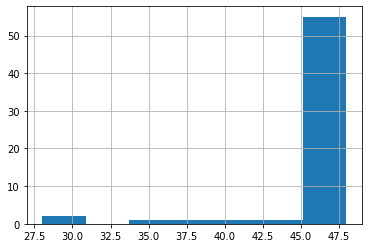

In [65]:
df.near_misses.hist(bins=int(np.sqrt(len(df))))

In [108]:
print(df.loc[df["near_misses"] == 48].shape)
print(df.loc[df["near_misses"] == 47].shape)
print(df.loc[df["near_misses"] == 46].shape)
print(df.loc[df["near_misses"] == 45].shape)
print(df.loc[df["near_misses"] == 41].shape)
print(df.loc[df["near_misses"] == 39].shape)
print(df.loc[df["near_misses"] == 35].shape)
print(df.loc[df["near_misses"] == 30].shape)
print(df.loc[df["near_misses"] == 28].shape)

(33, 2)
(21, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)


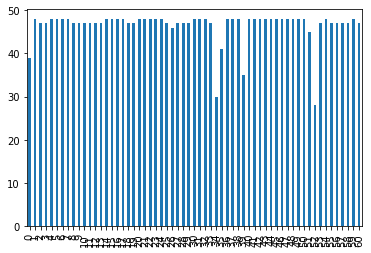

In [76]:
df.near_misses.plot(kind='bar')

In [86]:
df.near_misses.max()

48